<h2>Task:</h2>

Using the image dataset from the following link
(https://drive.google.com/drive/folders/1QGOx4H_bQHCdHmmOu2yt8mbmgqe8tMPq?usp=sharing) apply two classification models and compare their results. One model must be a transfer learning algorithm and the other a convolutional neural network (CNN). The images provided are in their respective classification labels, so you must determine how to import and use the data.

This code is used to mount Google Drive in the Google Colaboratory environment, enabling us to access the dataset that are stored there.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Now we are extracting the contents of a zip file named "MLPR_Images.zip" that is stored in a specific location in the Google Drive.

In [ ]:
#extract the MLPR dataset
!unzip "/content/drive/MyDrive/Machine_Learning/MLPR_Images.zip"

In [ ]:
import os

In [ ]:
#removing unnecessary dataset
!rm "MLPR Images/.DS_Store"

Reading the contents of the "MLPR Images" directory and storing the names of the subdirectories within it as a list named class_names. The list of directory names is then sorted alphabetically using the sort() technique. Finally, the sorted list of directory names is returned.

In [ ]:
#list out the folder names

class_names = os.listdir("MLPR Images")
class_names.sort()
class_names

['Product_1', 'Product_2', 'Product_3', 'Product_4', 'Product_5']

In [ ]:
print("Total Folders:",len(os.listdir("MLPR Images")))

Total Folders: 5


In [ ]:
number_classes = {}

In [ ]:
for i in range(len(os.listdir("MLPR Images"))):
  #print(class_names[i])
  number_classes[class_names[i]] = len(os.listdir("MLPR Images/Product_" + str(i+1)))

print(number_classes)

{'Product_1': 500, 'Product_2': 14, 'Product_3': 400, 'Product_4': 385, 'Product_5': 600}


The number of photographs in each subdirectory or class within the "MLPR Images" directory is being counted. The count for each class is then saved in a Python dictionary named number_classes. We'll get a dictionary with keys indicating class names and values reflecting the number of photos in each class.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
print("Total Images:",sum(number_classes.values()))

Total Images: 1899


Calculating the overall number of images that are present in each class under the "MLPR Images" directory.

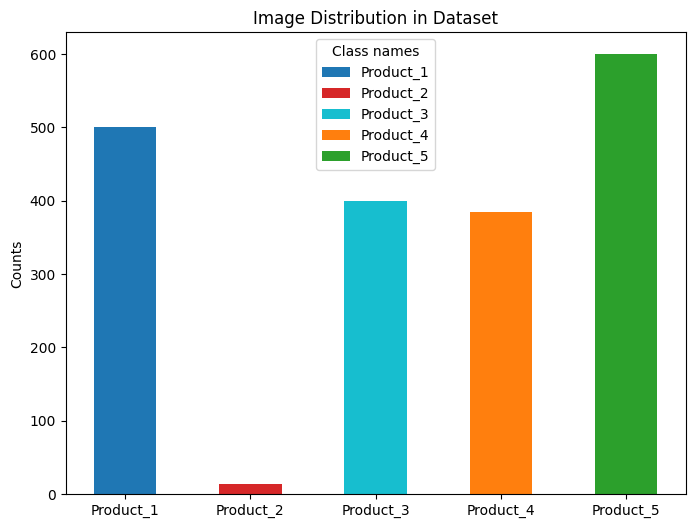

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

bar_colors = ['tab:blue', 'tab:red', 'tab:cyan', 'tab:orange','tab:green']

ax.bar(number_classes.keys(),number_classes.values(), label=number_classes.keys(), color=bar_colors,width = .5)
ax.set_ylabel('Counts')
ax.set_title('Image Distribution in Dataset')
ax.legend(title='Class names')

Making a bar graph with the matplotlib library that shows the number of photographs in each class within the "MLPR Images" directory from the graph we clearly see that Product_2 has every few images(14 images) compared with others classes.

In [ ]:
!mkdir -p "new_dataset/Product_2"

The CNN classifiers using balanced datasets achieve very good accurate performance so we can upscale the dataset with data-augmentation.

setting up a new directory called "Product_2" within the directory "new_dataset" The -p option instructs the mkdir command to create any necessary parent folders. If the "new_dataset" directory does not already exist, this operation will create it as well as a subdirectory called "Product_2." If the directory "new_dataset" already exists, it will simply create a new subfolder called "Product_2" within it.

<h3>Data Augmentation</h3>

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from skimage import io

datagen = ImageDataGenerator(
        rotation_range = 40,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        brightness_range = (0.5, 1.5))

import numpy as np
import os
from PIL import Image
image_directory = r'/content/MLPR Images/Product_2'
SIZE = 224
dataset = []
my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = io.imread(image_directory +"/" + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE,SIZE))
        dataset.append(np.array(image))
x = np.array(dataset)
i = 0
for batch in datagen.flow(x, batch_size=16,
                          save_to_dir= r'new_dataset/Product_2',
                          save_prefix='new',
                          save_format='jpg'):
    i += 1
    if i > 35:
        break

Using the Keras ImageDataGenerator class, augmenting data on a series of photos in the directory MLPR photos/Product_2.

The ImageDataGenerator class includes several image enhancement techniques such as rotation, shearing, zooming, and flipping.

In this case,

1. we are randomly rotating the image between -40 and 40 degrees.
2. We are randomly applying a shearing transformation with a shear intensity of 0.2.
3. We are randomly zooming into the image by up to 20%.
4. We are randomly turning the image horizontally.
5. We are randomly altering the brightness of the image between 0.5 and 1.5.


The code reads all.jpg files in the MLPR Images/Product_2 directory and resizes them to 224x224 pixel squares using the PIL Image class. It then converts them to numpy arrays and saves them in a dataset list.

Using the augmentation settings supplied in datagen, the datagen.flow() function generates batches of augmented photos. The flow() function accepts the input x, the batch size (batch_size), and the directory to which the augmented photos should be saved (save_to_dir). It creates batches of augmented photographs and saves them to the specified directory using the prefix new and the format jpg.

The loop runs for 36 iterations and then terminates, saving a total of 36x16=576 images in the new_dataset/Product_2 directory.


In [ ]:
len(os.listdir("new_dataset"))

1

In [ ]:
%rm -rf new_dataset/MLPR\ Images

In [ ]:
!cp -r "/content/MLPR Images/Product_1" "/content/MLPR Images/Product_2" "/content/new_dataset/"

In [ ]:
!cp -r "/content/MLPR Images/Product_3" "/content/MLPR Images/Product_4" "/content/MLPR Images/Product_5"  "/content/new_dataset/"

The first line% rm -rf new_dataset/MLPR Images removes the MLPR Images directory if it exists from the new_dataset directory.

The following line!cp -r "/content/MLPR Images/Product_1" cp -r "/content/MLPR Images/Product_2" cp -r "/content/new_dataset/" is moving the MLPR Images directory's Product_1 and Product_2 directories to the new_dataset directory.

The final line!cp -r "/content/MLPR Images/Product_3" "/content/MLPR Images/Product_4" "/content/MLPR Images/Product_5" "/content/new_dataset/" copies the folders Product_3, Product_4, and Product_5 from the MLPR Images directory to the new_dataset directory.

In [ ]:
class_names = os.listdir("new_dataset")
class_names.sort()
class_names

['Product_1', 'Product_2', 'Product_3', 'Product_4', 'Product_5']

We read the names of directories within the "new_dataset" directory and put them in a list called "class_names" below. The function "os.listdir()" is used to read the names of directories within the "new_dataset" directory. The "sort()" method is used to alphabetically sort a list of directory names. This list of directory names represents the various picture classes or categories found in the "new_dataset" directory.

In [ ]:
len(os.listdir("new_dataset"))

5

In [ ]:
number_classes = {}

In [ ]:
for i in range(len(os.listdir("new_dataset"))):
  #print(class_names[i])
  number_classes[class_names[i]] = len(os.listdir("new_dataset/Product_" + str(i+1)))

print(number_classes)

{'Product_1': 500, 'Product_2': 515, 'Product_3': 400, 'Product_4': 385, 'Product_5': 600}


The number of photographs in each subdirectory or class within the "new_data" directory is being counted. The count for each class is then saved in a Python dictionary named number_classes. We'll get a dictionary with keys indicating class names and values reflecting the number of photos in each class.

In [ ]:
print("Total Images:",sum(number_classes.values()))

Total Images: 2400


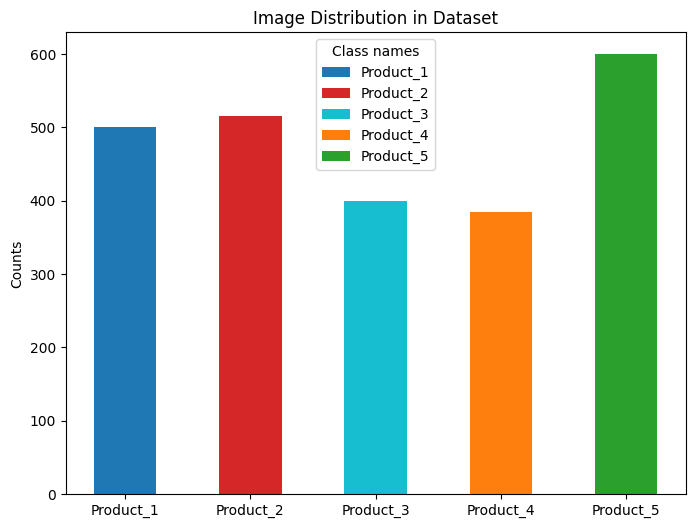

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

bar_colors = ['tab:blue', 'tab:red', 'tab:cyan', 'tab:orange','tab:green']

ax.bar(number_classes.keys(),number_classes.values(), label=number_classes.keys(), color=bar_colors,width = .5)
ax.set_ylabel('Counts')
ax.set_title('Image Distribution in Dataset')
ax.legend(title='Class names')

new_dataset/Product_1


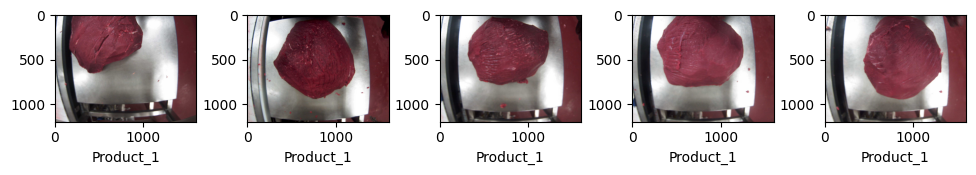

new_dataset/Product_2


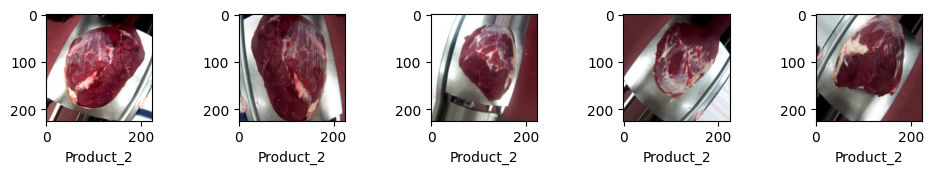

new_dataset/Product_3


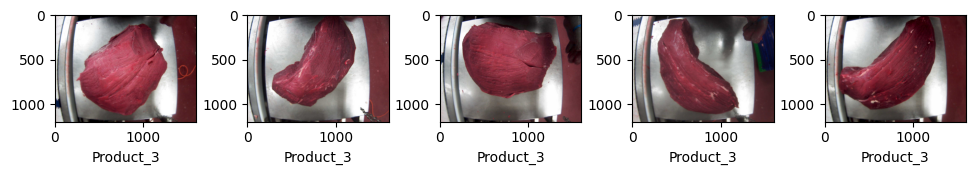

new_dataset/Product_4


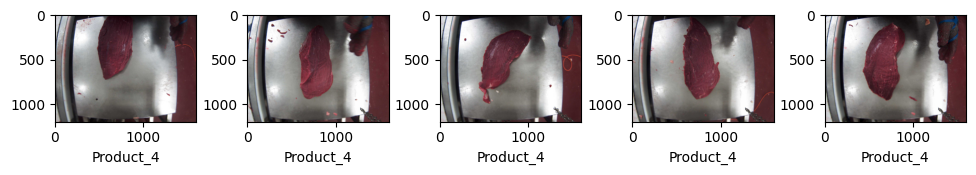

new_dataset/Product_5


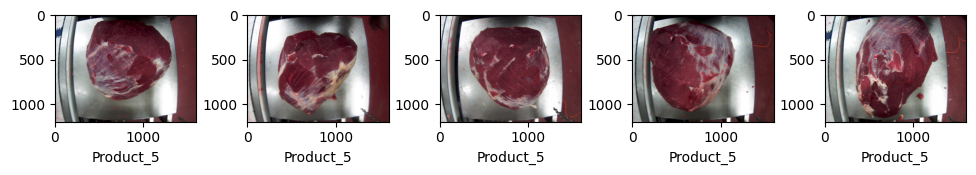

In [ ]:
import random
import matplotlib.image as mpimg

col = 5
row = 5

for i in range(len(os.listdir("new_dataset"))):
  path="new_dataset/Product_" + str(i+1)
  print(path)
  files=os.listdir(path)
  plt.figure(figsize=(12, 8))
  for j in range(1,6):
    d=random.choice(files)
    img = mpimg.imread(path + "/" + d)
    plt.subplot(row, col, j)
    plt.imshow(img)
    plt.xlabel("Product_" + str(i+1))
  plt.show()

In the new dataset, we are now displaying a random sample of 5 images from each product category.

First, a loop iterates over each product category directory in the "new_dataset" directory, identified by the index "i". The code fetches a list of all picture files within each product category directory. The photos are then displayed in a matplotlib figure with a grid of 5 rows and 5 columns.
Using the "random.choice" function, a random image file from the current product category is chosen for each row. The matplotlib library's "mpimg.imread" function is used to load the selected image. Finally, using the "plt.imshow" function, the image is plotted in the current grid cell, with the product category label we can also notice that Prodcut_2 dimenstion are less than others as it's been resized during <b>Data Augmentation</b> with size (224,224).

In [ ]:
import tensorflow as tf

img_height = 224
img_width = 224
batch_size = 16

dataset_path = "new_dataset"

train_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2400 files belonging to 5 classes.
Using 1920 files for training.


Using TensorFlow's image_dataset_from_directory function, construct a dataset of photos and their accompanying labels from a directory.

1. dataset_path: The directory path containing the images.
2. The percentage of photos to utilize for validation is specified by validation_split. 20% of the photos will be used for validation in this situation.
3. subset: Indicates whether a subset of the photos will be used for training or validation. We're utilizing the subset "training" in this example.
4. seed: The random seed that will be used to shuffle the data.
5. image_size: The size of the photos that will be resized.
6. batch_size: The number of photos included in each dataset batch.

The train_ds dataset that results will be used to train the model.

In [ ]:
print(train_ds)

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2400 files belonging to 5 classes.
Using 480 files for validation.


Here we are using subset as validation

In [ ]:
class_names = train_ds.class_names
print(class_names)
type(class_names)

['Product_1', 'Product_2', 'Product_3', 'Product_4', 'Product_5']


list

#Standardize the data

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


We are normalizing the image on the training dataset by using a Rescaling layer with a scale factor of 1/255. The layer is then applied to the training dataset using the map function. The lambda function lambda x, y: (normalization_layer(x), y) accepts an image and its matching label and applies the Rescaling layer on the image before returning it along with the label.

After normalizing, the pixel values in the image batch will vary between 0 and 1 instead of the original 0 to 255. This is validated by outputting the minimum and maximum pixel values of the first image in the batch using np.min(first_image) and np.max(first_image), respectively.

Create the model

In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

<p align="justify">The first layer is a Rescaling layer that normalizes the input image pixel values to be between 0 and 1.
Conv2D layers follow, which execute convolutional operations on the input pictures. Conv2D layer one contains 16 filters, layer two has 32 filters, and layer three has 64 filters with 3x3 kernal size and also we are using pading as same to get back the same image dimensions. Each Conv2D layer is followed by a MaxPooling2D layer, which performs maximum pooling on the convolutional layer's output.
Following the last MaxPooling2D layer, there is a Flatten layer that flattens the previous layer's output into a 1D array.
The Flatten layer's output is then sent to two fully linked Dense layers of 128 and num_classes nodes, respectively. The first Dense layer employs the ReLU activation function, but the last Dense layer does not.
<p align="justify">
The first Conv2D layer's input_shape argument determines the shape of the input images to the model, which is (img_height, img_width, 3) because the images are RGB color images. The number of classes in the dataset is controlled by the number of subdirectories in the dataset_path directory, which is set in the num_classes variable.</p>


#Compile the model

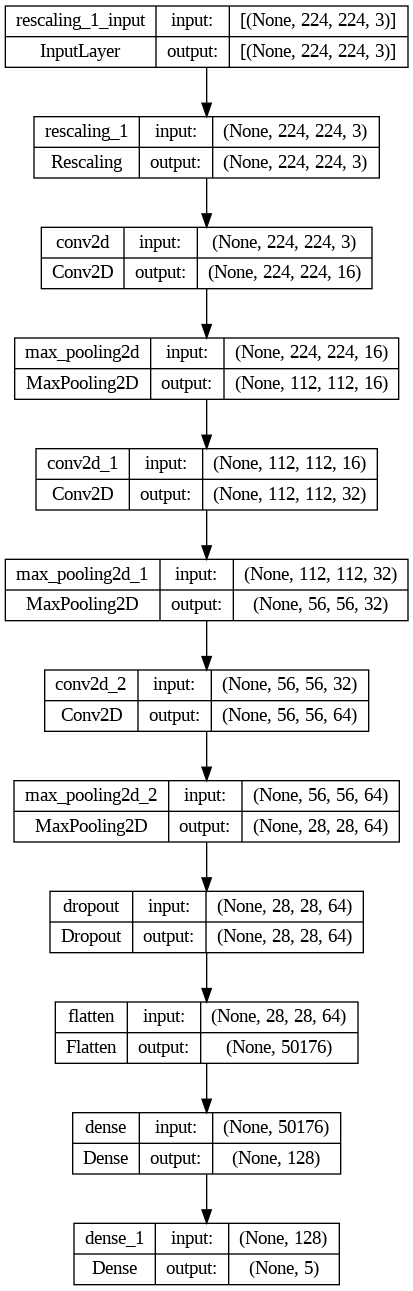

In [ ]:
# Explore model visually
plot_model(model,show_shapes=True)

<h3>Model summary</h3>

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

<p align="justify">We're using the 'adam' optimizer here. Adam is a popular optimization approach that works well in reality and is efficient for huge datasets.
It also defines the loss function to be used, which in this case is SparseCategoricalCrossentropy. This is useful for issues involving multi-class classification with integer labels.
Finally, it provides the metrics to be applied during training and evaluation, in this case "accuracy". The percentage of correctly categorized photos is what the accuracy metric calculates.</p>

<h3>Train the model</h3>

In [ ]:
epochs=10

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
120/120 [==============================] - 161s 1s/step - loss: 0.5127 - accuracy: 0.8234 - val_loss: 0.3188 - val_accuracy: 0.9062
Epoch 2/10
120/120 [==============================] - 164s 1s/step - loss: 0.1781 - accuracy: 0.9443 - val_loss: 0.1565 - val_accuracy: 0.9479
Epoch 3/10
120/120 [==============================] - 163s 1s/step - loss: 0.0932 - accuracy: 0.9734 - val_loss: 0.2354 - val_accuracy: 0.9312
Epoch 4/10
120/120 [==============================] - 163s 1s/step - loss: 0.0757 - accuracy: 0.9750 - val_loss: 0.2364 - val_accuracy: 0.9354
Epoch 5/10
120/120 [==============================] - 158s 1s/step - loss: 0.0754 - accuracy: 0.9734 - val_loss: 0.1747 - val_accuracy: 0.9354
Epoch 6/10
120/120 [==============================] - 157s 1s/step - loss: 0.0379 - accuracy: 0.9880 - val_loss: 0.1394 - val_accuracy: 0.9646
Epoch 7/10
120/120 [==============================] - 163s 1s/step - loss: 0.0248 - accuracy: 0.9932 - val_loss: 0.2704 - val_accuracy: 0.9521

Epochs are being set to 10 right now. The model is trained using the input data by the fit() method, which also accepts validation data (val_ds) and training data (train_ds).

After each epoch of training, the model calculates the accuracy and loss on both the training and validation data. When the validation loss has not improved for a predetermined number of epochs (set by the early_stopping parameter) or after the provided number of epochs, the training terminates.

The training and validation loss and accuracy metrics for each epoch are contained in the history object that the fit() method returns for each epoch. The code above assigns this history object to the history variable.

<h3>Visualize training results</h3>

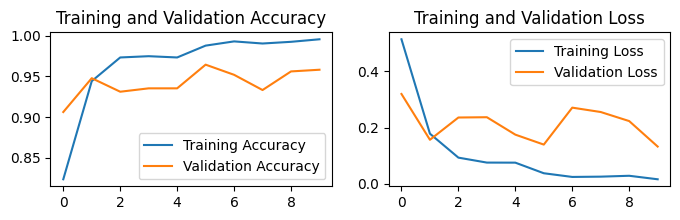

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 2))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

From the above graph we can see that in training and validation accuracy initialy the accuracy is less till the second epochs by the end of 10th epoch accuracy is between 95 to 100%. similarly in training and validation loss graph we can see that initial loss is high as model is training the loss is reduced.

In [ ]:
test_score = model.evaluate(val_ds)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100))
print("[INFO] Loss: ",test_score[0])

30/30 [==============================] - 10s 308ms/step - loss: 0.1325 - accuracy: 0.9583
[INFO] accuracy: 95.83%
[INFO] Loss:  0.13248410820960999


We can see that for validation dataset we have 95.83% accuracy

In [ ]:
train_score = model.evaluate(train_ds)
print("[INFO] accuracy: {:.2f}%".format(train_score[1] * 100))
print("[INFO] Loss: ",train_score[0])

120/120 [==============================] - 51s 412ms/step - loss: 0.0072 - accuracy: 0.9990
[INFO] accuracy: 99.90%
[INFO] Loss:  0.007249688263982534


We can see that for training dataset we have 99.90% accuracy

In [ ]:
metrics = model.evaluate(val_ds)
print(f"Number of missclassified images in validation dataset: {int((1 - metrics[1]) * len(val_ds) * batch_size)} of {len(val_ds) * batch_size}")

30/30 [==============================] - 10s 319ms/step - loss: 0.1325 - accuracy: 0.9583
Number of missclassified images in validation dataset: 20 of 480


The number of misclassified images in the validation dataset is printed here.

In [ ]:
metrics = model.evaluate(train_ds)
print(f"Number of missclassified images in Training dataset: {int((1 - metrics[1]) * len(train_ds) * batch_size)} of {len(train_ds) * batch_size}")

120/120 [==============================] - 47s 383ms/step - loss: 0.0072 - accuracy: 0.9990
Number of missclassified images in Training dataset: 1 of 1920


The number of misclassified images in the Train dataset is printed here.

In [ ]:
test_images = [] # images from test dataset
test_labels = [] # labels from test dataset
batches = []

for batch in val_ds.as_numpy_iterator():
    batches.append(batch)

for next_batch in batches:
    for image in next_batch[0]:
        test_images.append(image)
    for label in next_batch[1]:
        test_labels.append(label)

test_images = np.asarray(test_images)
test_labels = np.asarray(test_labels)
y_pred = np.array(model.predict(test_images))
y_true = np.array(test_labels)

15/15 [==============================] - 8s 532ms/step


Creating lists to store the validation dataset's test pictures and labels, and then adding batches from the validation dataset iterator to those lists. Following that, the test images and labels are converted into numpy arrays, and the predict method is used by the model to predict the labels for the test images. A numpy array is also used to store the true labels.

In [ ]:
pred_max = []
for x in y_pred:
    pred_max.append(np.argmax(x))
y_pred = pred_max

In [ ]:
false_class = list()
true_class = list()
for i in range(len(test_images)):
    if y_pred[i] != y_true[i]:
        false_class.append((test_images[i],y_pred[i],y_true[i]))
    else:
        true_class.append((test_images[i],y_pred[i],y_true[i]))

This code is useful for identifying which images of machine learning model are being misclassified. After allowing the code for further investigation and potential improvements of the architecture.

              precision    recall  f1-score   support

   Product_1       0.99      0.88      0.93       107
   Product_2       1.00      0.99      0.99        97
   Product_3       0.88      0.94      0.91        79
   Product_4       0.97      1.00      0.98        86
   Product_5       0.95      0.99      0.97       111

    accuracy                           0.96       480
   macro avg       0.96      0.96      0.96       480
weighted avg       0.96      0.96      0.96       480



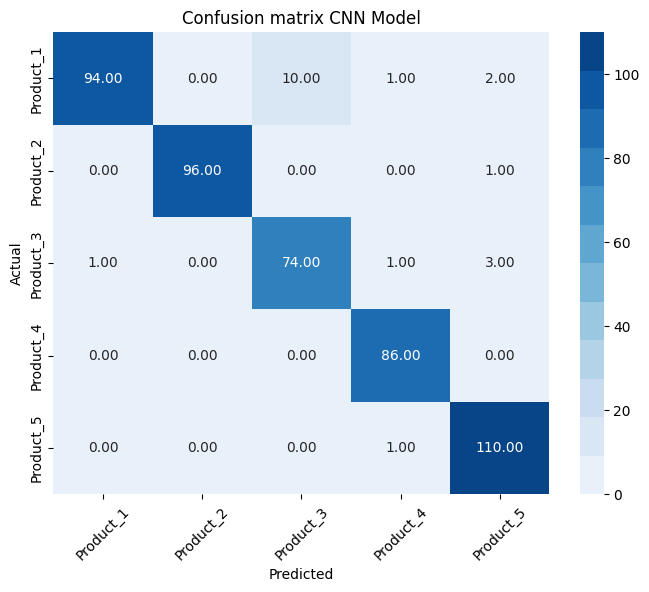

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print(classification_report(y_true, y_pred, target_names=val_ds.class_names))

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
plt.title('Confusion matrix CNN Model')
sns.heatmap(cm,
            annot=True,
            fmt=".2f",
            cmap=sns.color_palette("Blues",12),
            yticklabels=class_names,
            xticklabels=class_names)

plt.xticks(rotation=45)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

This code is used to create heatmap for the  visualization of a confusion matrix for a classification model prediction of the products.
Overall, the confusion matrix gives a valuable picture of the classifier's performance, indicating which classes are confused with one other and where errors occur.

In [ ]:
def plot_results(img,pred,actual):
  plt.figure(figsize=(4, 4))
  plt.imshow(img)
  plt.title("Predicted Label: {}, Actual Label: {}".format(pred, actual))
  plt.axis('off')
  plt.show()

1/1 [==============================] - 0s 249ms/step
[[  1.1243988  15.193577   -3.971696  -10.186696    3.1039104]]


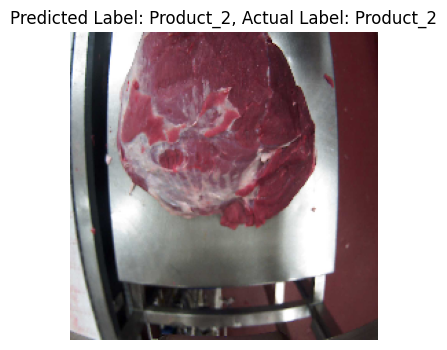

This image most likely belongs to Product_2 with a 100.00 percent confidence.


In [ ]:
img = tf.keras.utils.load_img("/content/new_dataset/Product_2/1501136779.jpg", target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
print(predictions)
score = tf.nn.softmax(predictions[0])

plot_results(img,class_names[np.argmax(score)],"Product_2")

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

<p align= "justify">Using the tf.keras.utils.load_img() function, we now load an image from a file path and resize it to the img_height and img_width parameters that were set before. The image is then extended to make a batch using tf.expand_dims() and transformed to a numpy array using the tf.keras.utils.img_to_array() function. With the help of model.predict(), predictions are made for this collection of photographs using the model. The tf.nn.softmax() algorithm is then used to turn the predictions into a probability distribution. The image is then displayed together with its anticipated class and actual class using the plot_results() method. The printed statement gives the anticipated class with the highest likelihood along with its percentage confidence level.</p>

In [ ]:
import tensorflow_hub as hub

In [ ]:
feature_extractor = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [ ]:
feature_extractor_layer = hub.KerasLayer(
    feature_extractor,
    input_shape=(224, 224, 3),
    trainable=False)

We are extracting MobileNet V2, a Google-developed pre-trained deep learning model.
A convolutional neural network trained on millions of photos from the ImageNet dataset serves as the feature extractor. It takes a 224x224 pixel input image with three color channels (red, green, and blue) and returns a vector of 1280 features that describe essential image qualities. These attributes can be fed into another machine learning model to perform a task like picture categorization or object detection.

The feature extractor layer is set to be non-trainable, which means that its weights and biases will not be altered during downstream model training. This is because the feature extractor's learnt features are already tuned for broad picture recognition tasks and are not tailored to the downstream task. The feature extractor can be utilized as a fixed input to the downstream model by freezing the weights, letting it to focus on learning task-specific characteristics.

In [ ]:
t_model = tf.keras.Sequential([
  feature_extractor_layer,
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(5,activation='softmax')
])

In [ ]:
t_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

To prevent overfitting during training, a Dropout layer is added, and as the output layer, a Dense layer with a softmax activation function is added to forecast the probability distribution of the input image belonging to each of the five possible classes.

The Adam optimizer, Sparse Categorical Crossentropy loss function, and accuracy as the evaluation metric are then used to assemble the model.

In [ ]:
t_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
epochs=10

history = t_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
121/121 [==============================] - 93s 723ms/step - loss: 0.8792 - accuracy: 0.6653 - val_loss: 0.5008 - val_accuracy: 0.8750
Epoch 2/10
121/121 [==============================] - 90s 739ms/step - loss: 0.4630 - accuracy: 0.8438 - val_loss: 0.3647 - val_accuracy: 0.8979
Epoch 3/10
121/121 [==============================] - 89s 734ms/step - loss: 0.3427 - accuracy: 0.8990 - val_loss: 0.2872 - val_accuracy: 0.9208
Epoch 4/10
121/121 [==============================] - 90s 734ms/step - loss: 0.2916 - accuracy: 0.9120 - val_loss: 0.2702 - val_accuracy: 0.9125
Epoch 5/10
121/121 [==============================] - 83s 680ms/step - loss: 0.2808 - accuracy: 0.9084 - val_loss: 0.2356 - val_accuracy: 0.9354
Epoch 6/10
121/121 [==============================] - 89s 735ms/step - loss: 0.2378 - accuracy: 0.9266 - val_loss: 0.2460 - val_accuracy: 0.9229
Epoch 7/10
121/121 [==============================] - 91s 749ms/step - loss: 0.2283 - accuracy: 0.9240 - val_loss: 0.2066 - val_ac

Here, this code is used to train a neural network model called as t_model using the Keras API, with this code it trains dataset called train_ds and the a validation of dataset is called val_ds. The model is being trained for a given number of epochs specified by the epochs variable, which in this case is set to 5.

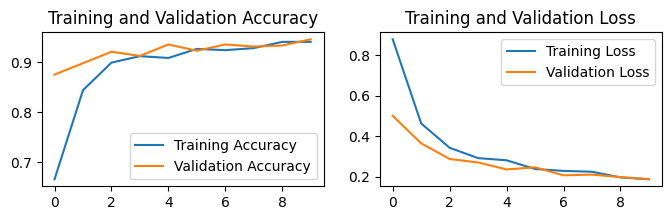

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 2))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The above graph shows the transfer learning model training, validation accuracy and loss.

In [ ]:
test_score = t_model.evaluate(val_ds)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100))
print("[INFO] Loss: ",test_score[0])

30/30 [==============================] - 17s 537ms/step - loss: 0.1877 - accuracy: 0.9458
[INFO] accuracy: 94.58%
[INFO] Loss:  0.18774782121181488


We can see that for validation dataset we have 94.58% accuracy

In [ ]:
train_score = t_model.evaluate(train_ds)
print("[INFO] accuracy: {:.2f}%".format(train_score[1] * 100))
print("[INFO] Loss: ",train_score[0])

121/121 [==============================] - 72s 584ms/step - loss: 0.1434 - accuracy: 0.9568
[INFO] accuracy: 95.68%
[INFO] Loss:  0.14335885643959045


We can see that for training dataset we have 95.68% accuracy

In [ ]:
metrics = t_model.evaluate(val_ds)
print(f"Number of missclassified images in validation dataset: {int((1 - metrics[1]) * len(val_ds) * batch_size)} of {len(val_ds) * batch_size}")

30/30 [==============================] - 19s 606ms/step - loss: 0.1877 - accuracy: 0.9458
Number of missclassified images in validation dataset: 26 of 480


In [ ]:
metrics = t_model.evaluate(train_ds)
print(f"Number of missclassified images in Training dataset: {int((1 - metrics[1]) * len(train_ds) * batch_size)} of {len(train_ds) * batch_size}")

121/121 [==============================] - 72s 595ms/step - loss: 0.1434 - accuracy: 0.9568
Number of missclassified images in Training dataset: 83 of 1936


In [ ]:
test_images = [] # images from test dataset
test_labels = [] # labels from test dataset
batches = []

for batch in val_ds.as_numpy_iterator():
    batches.append(batch)

for next_batch in batches:
    for image in next_batch[0]:
        test_images.append(image)
    for label in next_batch[1]:
        test_labels.append(label)

test_images = np.asarray(test_images)
test_labels = np.asarray(test_labels)
y_pred = np.array(t_model.predict(test_images))
y_true = np.array(test_labels)

15/15 [==============================] - 19s 1s/step


Creating lists to store the validation dataset's test images and labels, and then adding batches from the validation dataset iterator to those lists. Following that, the test images and labels are converted into numpy arrays, and the model uses the predict method to predict the labels for the test images. True labels are also stored in a numpy array.

In [ ]:
pred_max = []
for x in y_pred:
    pred_max.append(np.argmax(x))
y_pred = pred_max

In [ ]:
false_class = list()
true_class = list()
for i in range(len(test_images)):
    if y_pred[i] != y_true[i]:
        false_class.append((test_images[i],y_pred[i],y_true[i]))
    else:
        true_class.append((test_images[i],y_pred[i],y_true[i]))

In this section, we identify which machine learning model photos are being misclassified. After enabling the code for additional analysis and potential architecture improvements.

              precision    recall  f1-score   support

   Product_1       0.98      0.88      0.93       107
   Product_2       1.00      0.99      0.99        97
   Product_3       0.85      0.91      0.88        79
   Product_4       0.98      1.00      0.99        85
   Product_5       0.92      0.96      0.94       112

    accuracy                           0.95       480
   macro avg       0.95      0.95      0.95       480
weighted avg       0.95      0.95      0.95       480



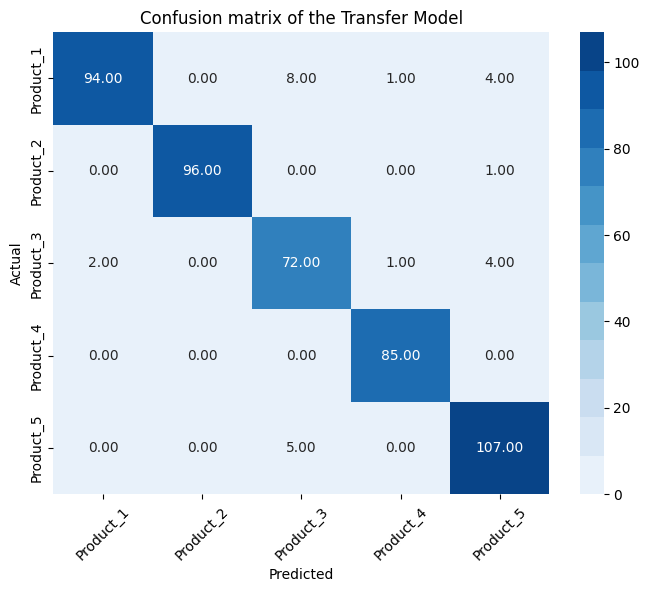

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true, y_pred, target_names=val_ds.class_names))

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
plt.title('Confusion matrix of the Transfer Model')
sns.heatmap(cm,
            annot=True,
            fmt=".2f",
            cmap=sns.color_palette("Blues",12),
            yticklabels=class_names,
            xticklabels=class_names)

plt.xticks(rotation=45)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The classification_report function from sklearn.metrics is used to generate a report that includes evaluation metrics such as precision, recall, and F1-score for each class in the validation set. This aids in assessing the trained transfer model's performance on the validation set.

The confusion matrix illustrates how well the transfer model performs in properly anticipating the labels of each class. On the y-axis of the heatmap are the actual labels, and on the x-axis are the anticipated labels. Each square in the heatmap is colored to represent the number of samples that fall within a certain predicted-actual label combination.

The models are being evaluated based on their accuracy and losses. First, let's go over the outcomes of both models:

Our CNN model validation_data has a loss of 0.1324 and an accuracy of 95.83%; our Transfer learning model validation_data has a loss of 0.1877 and an accuracy of 94.58%.

The statistics quickly show that our CNN model has higher accuracy and lower loss than the transfer learning model. For our dataset, the CNN model performs better.

Both models performed well, but from the above metrics we can see that CNN model is a few steps ahead of the mobilenet_v2(transfer learning) model this can be due to transfer learning model had very few features related to our dataset.
